# Gumbel Distribution and Gumbel-Softmax

In this notebook, we will explore the Gumbel Distribution, Gumbel Random Variable, and Gumbel-Softmax, including their properties, advantages, disadvantages, and their relation to Machine Learning. We will also provide Python examples to illustrate their effectiveness compared to other methods.

## Gumbel Distribution

The Gumbel Distribution, also known as the Smallest Extreme Value (SEV) or the Smallest Extreme Value Type I distribution, is used to model the distribution of the maximum (or the minimum) of a number of samples of various distributions. This distribution might be used to represent the distribution of the maximum level of a river in a particular year if there was a list of maximum yearly levels. It is useful in predicting the chance that an extreme event will occur.

The cumulative distribution function of a Gumbel distributed random variable is:

F(x; μ, β) = exp(-exp(-(x - μ) / β))

where μ is the mode (location parameter) of the distribution, and β > 0 is the scale parameter.

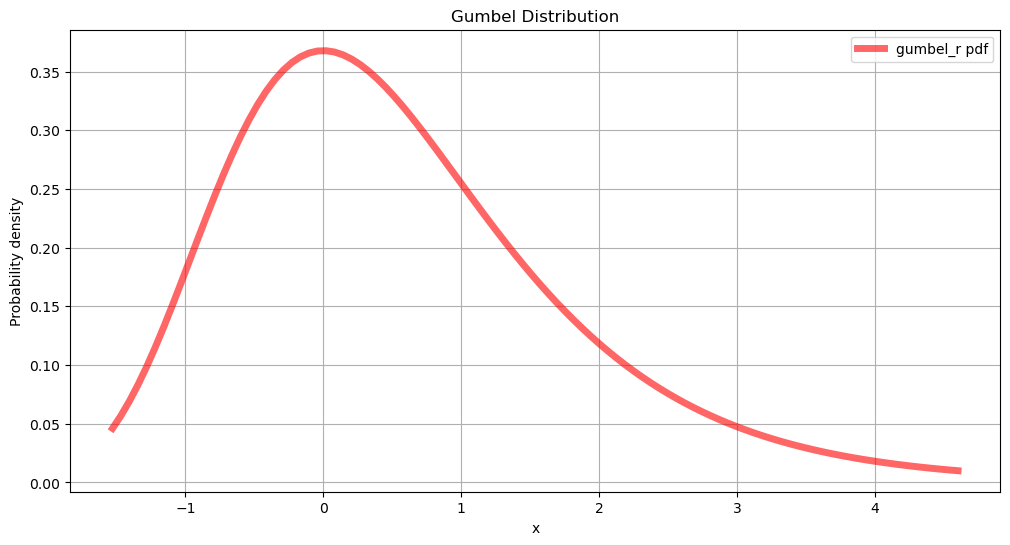

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

mu, beta = 0, 1  # location and scale
x = np.linspace(gumbel_r.ppf(0.01, mu, beta), gumbel_r.ppf(0.99, mu, beta), 100)

plt.figure(figsize=(12, 6))
plt.plot(x, gumbel_r.pdf(x, mu, beta), 'r-', lw=5, alpha=0.6, label='gumbel_r pdf')
plt.title('Gumbel Distribution')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()

## Gumbel-Softmax

The Gumbel-Softmax distribution, also known as the Concrete distribution, is a way of drawing samples from a categorical distribution that is differentiable. This is useful in machine learning when we want to use gradient-based optimization methods to learn the parameters of a categorical distribution.

The Gumbel-Softmax distribution is parameterized by a vector of probabilities `p` and a temperature parameter `τ`. The temperature parameter controls the sharpness of the distribution: as `τ` approaches 0, the Gumbel-Softmax distribution approaches the categorical distribution; as `τ` approaches infinity, the Gumbel-Softmax distribution approaches the uniform distribution.

To draw a sample from the Gumbel-Softmax distribution, we first draw a sample from the Gumbel distribution for each category, then apply the softmax function to obtain a probability vector. The softmax function is applied with the temperature parameter, which controls the sharpness of the distribution.

Let's implement this in Python.

In [2]:
def gumbel_softmax_sample(logits, temperature):
    """ Draw a sample from the Gumbel-Softmax distribution """
    noise = np.random.gumbel(size=logits.shape)
    return np.exp((logits + noise) / temperature) / np.sum(np.exp((logits + noise) / temperature))

logits = np.array([0.2, 0.3, 0.5])
temperature = 1.0

print('Sample from Gumbel-Softmax distribution: ', gumbel_softmax_sample(logits, temperature))

Sample from Gumbel-Softmax distribution:  [0.42204301 0.01383646 0.56412053]


## Advantages and Disadvantages

### Advantages

1. **Differentiability**: The Gumbel-Softmax distribution is differentiable, which makes it suitable for gradient-based optimization methods. This is particularly useful in machine learning, where we often want to learn the parameters of a model by optimizing a loss function.
2. **Flexibility**: The temperature parameter allows us to control the sharpness of the distribution. This can be useful in various settings. For example, in the early stages of training a model, we might want a higher temperature to encourage exploration, while in the later stages, we might want a lower temperature to encourage exploitation.

### Disadvantages

1. **Approximation**: The Gumbel-Softmax distribution is an approximation to the categorical distribution. While the approximation becomes exact as the temperature approaches 0, for higher temperatures, there may be a discrepancy between the two.
2. **Computational Complexity**: The Gumbel-Softmax distribution requires us to draw a Gumbel sample for each category and apply the softmax function, which can be computationally expensive for a large number of categories.

## Relation to Machine Learning

The Gumbel-Softmax distribution is particularly useful in the context of reinforcement learning, where we often want to learn a policy that is a distribution over actions. The differentiability of the Gumbel-Softmax distribution allows us to use gradient-based methods to learn the policy.

In the context of deep learning, the Gumbel-Softmax distribution can be used in the training of neural networks that involve discrete variables. For example, it can be used in the training of variational autoencoders with discrete latent variables.

Let's now compare the Gumbel-Softmax distribution with other methods in terms of effectiveness. For this, we will use a simple reinforcement learning task as an example.